# Question 1

Suppose you are working as a data mining consultant for an Internet Search Engine Company. Briefly describe (1 short paragraph each)  how data mining can help the company by giving one example each of an application for which the techniques for (i) regression (ii) classification, (iii) anomaly detection  can be used.

## Answer

Any suitable answers are good. One example could be (i) Ad optimization (ii) Spam detection (iii) Potential terrorist threat identification.

# Question 2

Wishing to estimate the average time it takes to load Canvas on her tablet, Alice does the following study: She records the time $x_i$ that Canvas takes to load (in milliseconds),  $i=1,...,N$, at $N$  randomly selected time-points during one day. Suppose that the time it takes to load the webpage can be well represented by the pdf $\lambda \exp (- \lambda x)$,  which has a single (unknown) parameter, $\lambda$. Derive the maximum likelihood estimate for $\lambda$ from first principles. (i.e. do no just write down the answer).

## Answer

The given pdf is (x is time, pdf is zero for negative x): 

$$f(x;\lambda) = \lambda \exp (- \lambda x)$$

Assuming each instance of the experiment is independent of all others, the Likelihood is the product of the densities at the N given points.
Therefore Log-likelihood L($x_1, x_2, \ldots, x_n $) can be written as: 

\begin{equation*}
L = n \log(\lambda) - \lambda \sum_i x_i
\end{equation*}

which gives,
\begin{equation*}
\frac{\partial L}{ \partial \lambda } = \frac{n}{\lambda} - \sum_i x_i
\end{equation*}

Equating to 0 gives $\lambda = \frac{n}{\sum_i x_i}$ as the maximum likelihood estimate.
This makes intuitive sense. The pdf given is actually the exponential distribution, which has a single parameter, $\lambda$,  the (average) rate (inverse of time). The MLE of the rate is obtained as the inverse of the average inter-arrival time of the given data points.

# Question 3

Suppose $X$ and $Y$ are two random variables whose joint distribution is Normal (Gaussian), centered at (0,0) and with correlation $\rho$. (See "Bivariate Case" in the Wikipedia entry for "Multivariate Normal Distribution" for the equation, or use just use the vector form given in the class notes, with $\sigma_{12} = \sigma_{21} = \rho \sigma_{x} \sigma_{y} $). Consider 2 cases:
1. $\sigma_x^2 = 4; \sigma_y^2 = 9; \rho = 0$
2. $\sigma_x^2 = 4; \sigma_y^2 = 9; \rho = 0.5$

a. Obtain contour plots for each of the two distributions using  Python (http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.kdeplot.html). 

b. View 3-D plots for the two distributions from at least two different viewing perspectives each (http://matplotlib.org/examples/mplot3d/rotate_axes3d_demo.html).

c. Consider the bivariate Normal Distribution given in part (ii). Reading   the ``Bivariate Case" under "Conditional distributions" in the Wikipedia entry will help you answer this problem; alternatively you can consult any undergraduate text on probability/statistics.  What is the mathematical form of the conditional distribution that is obtained when (a) $x$ is set to 1, and (b) when y is set to 1?
(no need to actually derive the formulae from first principles; rather just  obtain the result by substition in the formula for a bivariate Gaussian.

## Answer

### a

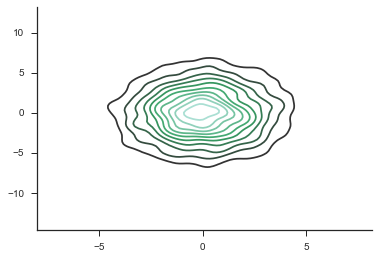

In [1]:
import numpy as np
import seaborn as sns
sns.set(style='ticks', palette='Set2')
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
%matplotlib inline

def get_bivariate_normal(mean, cov, size):
    return np.random.multivariate_normal(mean, cov, size)


def plot_2d_contour(mean, cov, size=5000):
    bivariate_normal = get_bivariate_normal(mean, cov, size)
    sns.kdeplot(bivariate_normal[:, 0], bivariate_normal[:, 1])
    sns.despine()
    

def plot_3d_contour(mean, cov, view_angle, start_mesh=-10, end_mesh=10, delta=0.1):
    x, y = np.mgrid[start_mesh:end_mesh:delta, start_mesh:end_mesh:delta]
    pos = np.empty(x.shape + (2,))
    pos[:, :, 0] = x; pos[:, :, 1] = y
    probability = multivariate_normal.pdf(pos, mean, cov)
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(30, view_angle)
    ax.plot_wireframe(x, y, probability, rstride=5, cstride=5)


mean_1 = mean_2 = [0, 0]
cov_1 = [[4, 0], [0, 9]]
cov_2 = [[4, 3], [3, 9]]

plot_2d_contour(mean_1, cov_1)

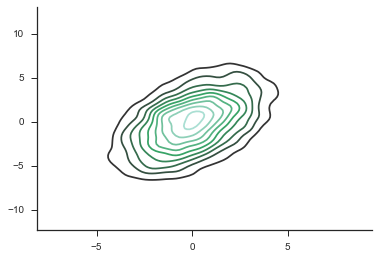

In [2]:
plot_2d_contour(mean_2, cov_2)

### b

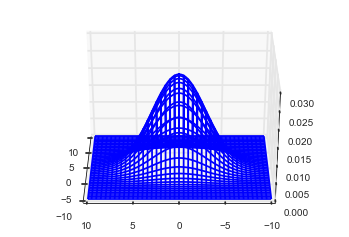

In [3]:
plot_3d_contour(mean_1, cov_1, 180)

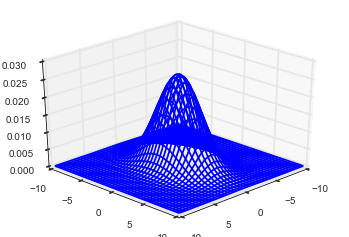

In [4]:
plot_3d_contour(mean_1, cov_1, 45)

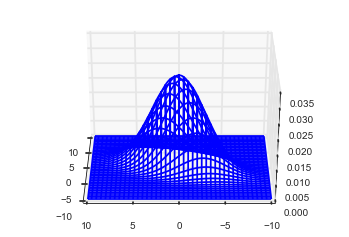

In [5]:
plot_3d_contour(mean_2, cov_2, 180)

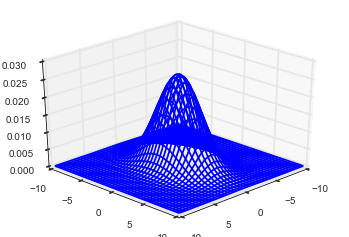

In [6]:
plot_3d_contour(mean_1, cov_1, 45)

### c

The form of the conditional distribution is $X_1 \mid (X_2 = x_2) \sim N(\mu_1 + \frac{\sigma_1}{\sigma_2}\rho(x_2-\mu_2), (1 - \rho^2)\sigma_1^2)$.
For $x = 1$ we have:
\begin{align*}
p(Y \mid x = 1) \sim N(0 + \frac{3}{2}0.5(1-0), (1-0.5^2)9) = N(3/4, 27/4) 
\end{align*}
Similarly, for $y=1$:
\begin{align*}
p(X \mid y = 1) \sim N(0 + \frac{2}{3}0.5(1-0), (1-0.5^2)4) = N(1/3, 3) 
\end{align*}
Note that conditioning always reduces variance, except when $\rho=0$.

# Question 4

The student data set (found on Canvas) records properties of 657 students. For a description of the data, see
http://cran.r-project.org/web/packages/LearnBayes/LearnBayes.pdf. Python packages that will be useful: Pandas, Matplotlib, and Seaborn.

1. Construct a histogram of the variable Shoes. (Use 20 bins)
2. Use data visualization to check if the variable Dvds (approximately) follows a  log-normal distribution.
3. Summarize the variable Haircut using the Panda's describe command. Also, report the 2.5th and 97.5th percentiles.
4. Construct a barplot of the individual values of Drink that were observed. Also, highlight the distribution of the variable Drink between the two genders on the same barplot.
5. Construct a scatter plot of the variables ToSleep and WakeUp. Do you observe a positive correlation between the two variables?

Note: Omit missing values if any are present.

## Answer

### 1

In [7]:
import pandas as pd

student_data = pd.read_csv("studentdata.csv", sep=' ', quoting=1)
student_data = student_data.dropna()
student_data.head()

IOError: File studentdata.csv does not exist

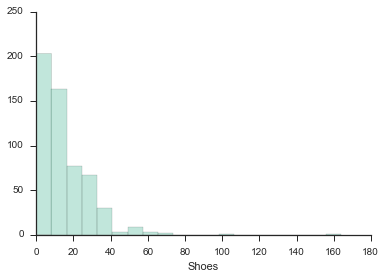

In [8]:
sns.distplot(student_data.Shoes, kde=False, bins=20)
sns.despine()

### 2
Yes - roughly log normal

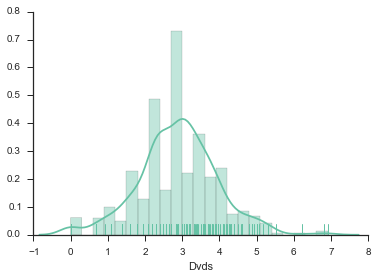

In [10]:
sns.distplot(np.log(student_data[student_data.Dvds > 0].Dvds), rug=True)
sns.despine()

### 3

In [11]:
student_data.Haircut.describe(percentiles=[.025,.25, .5, .75, .975])

count    559.000000
mean      26.228569
std       27.782842
min        0.000000
2.5%       0.000000
25%       10.000000
50%       17.000000
75%       30.000000
97.5%    100.450000
max      180.000000
Name: Haircut, dtype: float64

### 4

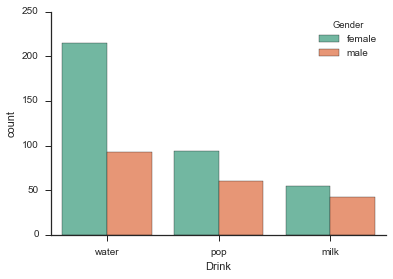

In [12]:
sns.countplot(x="Drink", hue="Gender", data=student_data)
sns.despine()

### 5
Yes - slight positive correlation

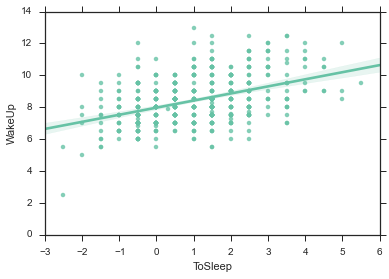

In [13]:
sns.regplot(student_data.ToSleep, student_data.WakeUp)

# Question 5

For this problem, we will be using the scikit-learn package in Python to predict housing prices using regression. The housing data can be found here: https://archive.ics.uci.edu/ml/machine-learning-databases/housing/.

1. Fit a simple linear regression of medv on lstat. What is the coefficient on lstat and what is its interpretation?
2. Plot medv and and lstat in a scatter plot with the regression line. Comment on the fit.
3. Split the data randomly into a training and test set (1/3 for test). Train a multiple linear regression on all the variables using the training data and evaluate the trained model on the test data using root mean squared error. Discuss the results.
4. Let us try to fit an MLR to this dataset, with MEDV as the dependent variable.  MEDV has a somewhat longish tail and is not so Gaussian-like, so we will take a log transform, and then predict LMDEV instead.  (You should convince yourself that this is a better idea by looking at the histograms and quantile plots to assess normality; however no need to submit such plots). Keep the first 350 records as a training set (call it Bostrain) which you will use to fit the model; the remaining 156 will be used as a test set (Bostest). Use only the following variables in your model: $LMEDV\sim LSTAT+RM+CRIM+ZN+CHAS$.

    1. Report the MSE obtained on Bostrain. How much does this increase when you score your model on  Bostest?
    2. Report the coefficients obtained by learning the regression model.
    3. Do you think your MLR model is reasonable for this problem? You may look at the distribution of residuals to provide an informed answer.

## Answer

### 1

In [14]:
from sklearn.linear_model import LinearRegression

housing_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data",
                   delim_whitespace=True, header=None,
                   names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
                           'B', 'LSTAT', 'MEDV'])
housing_data = housing_data.dropna()
housing_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [15]:
clf = LinearRegression()
clf.fit(housing_data.LSTAT.reshape(-1, 1), housing_data.MEDV)
print ("Coeff value: {}").format(clf.coef_[0])
print ("Means that all else constant, an increase in LSTAT by a value of 1 decreases MEDV by .95")

Coeff value: -0.950049353758
Means that all else constant, an increase in LSTAT by a value of 1 decreases MEDV by .95


### 2
Fit looks almost quadratic. Maybe a linear relationship isn't the best. Could look into adding a quadratic term as well to the model.

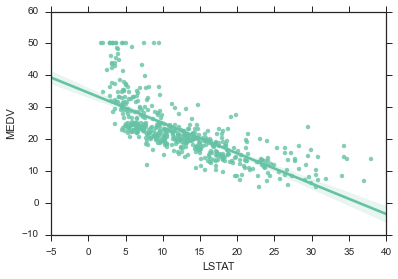

In [16]:
sns.regplot(housing_data.LSTAT, housing_data.MEDV)

### 3

In [17]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error

y = housing_data.MEDV.values
X = housing_data.copy()
del X['MEDV']
X = X.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("On average, our prediction is off by a MEDV amount of: {}".format(rmse))

On average, our prediction is off by a MEDV amount of: 4.55236459846


### 4

In [18]:
variables = ['LSTAT', 'RM', 'CRIM', 'ZN', 'CHAS']
split_point = 350
log_medv = np.log(housing_data.MEDV.values)
X_train = housing_data.ix[:(split_point-1), variables].values
X_test = housing_data.ix[split_point:, variables].values
y_train = log_medv[:split_point]
y_test = log_medv[split_point:]

clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### a

In [19]:
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)
print("Train MSE: {}".format(mean_squared_error(y_train, train_predictions)))
print("Test MSE: {}".format(mean_squared_error(y_test, test_predictions)))

Train MSE: 0.0175745406626
Test MSE: 0.165505943454


#### b

In [20]:
print("Coefficients: {}".format(dict(zip(variables, clf.coef_))))

Coefficients: {'CRIM': -0.006195563839933132, 'RM': 0.30887981712772999, 'ZN': 0.00041253183973814376, 'CHAS': 0.080209389103405221, 'LSTAT': -0.014009810952274056}


#### c

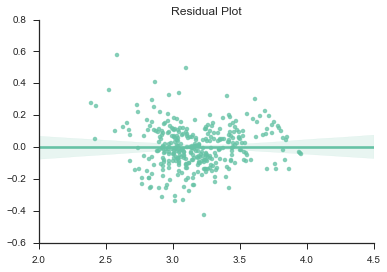

In [21]:
residuals = y_train - train_predictions
plt.title("Residual Plot")
sns.regplot(train_predictions, residuals)
sns.despine()

See p.92 of ISLR for a discussion of residual plots. These are useful in detecting non-linearities in our data. Since there is no discernable pattern in the residual plot above we have some evidence that suggests a linear model is a good choice for this problem.